In [1]:
import cellxgene_census

help(cellxgene_census)
help(cellxgene_census.get_anndata)

Help on package cellxgene_census:

NAME
    cellxgene_census - An API to facilitate use of the CZI Science CELLxGENE Census. The Census is a versioned container of single-cell data hosted at `CELLxGENE Discover`_.

DESCRIPTION
    The API is built on the `tiledbsoma` SOMA API, and provides a number of helper functions including:
    
        * Open a named version of the Census, for use with the SOMA API
        * Get a list of available Census versions, and for each version, a description
        * Get a slice of the Census as an AnnData, for use with ScanPy
        * Get the URI for, or directly download, underlying data in H5AD format
    
    For more information on the API, visit the `cellxgene_census repo`_. For more information on SOMA, see the `tiledbsoma repo`_.
    
    .. _CELLxGENE Discover:
        https://cellxgene.cziscience.com/
    
    .. _cellxgene_census repo:
        https://github.com/chanzuckerberg/cellxgene-census/
    
    .. _tiledbsoma repo:
        https://g

In [2]:
# query slice of metadata
with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2023-12-15. Specify 'census_version="2023-12-15"' in future calls to open_soma() to ensure data consistency.


                assay        cell_type                 tissue tissue_general  \
0        Smart-seq v4  microglial cell  middle temporal gyrus          brain   
1        Smart-seq v4  microglial cell  middle temporal gyrus          brain   
2        Smart-seq v4  microglial cell  middle temporal gyrus          brain   
3        Smart-seq v4  microglial cell  middle temporal gyrus          brain   
4        Smart-seq v4  microglial cell  middle temporal gyrus          brain   
...               ...              ...                    ...            ...   
607636  microwell-seq           neuron          adrenal gland  adrenal gland   
607637  microwell-seq           neuron          adrenal gland  adrenal gland   
607638  microwell-seq           neuron          adrenal gland  adrenal gland   
607639  microwell-seq           neuron          adrenal gland  adrenal gland   
607640  microwell-seq           neuron          adrenal gland  adrenal gland   

       suspension_type disease     sex 

In [3]:
# obtain slice as anndata
import cellxgene_census

with cellxgene_census.open_soma() as census:
    adata = cellxgene_census.get_anndata(
        census = census,
        organism = "Homo sapiens",
        var_value_filter = "feature_id in ['ENSG00000161798', 'ENSG00000188229']",
        obs_value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = {"obs": ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]},
    )

    print(adata)

The "stable" release is currently 2023-12-15. Specify 'census_version="2023-12-15"' in future calls to open_soma() to ensure data consistency.


AnnData object with n_obs × n_vars = 607641 × 2
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'


In [4]:
print(adata)

AnnData object with n_obs × n_vars = 607641 × 2
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'


In [5]:
# memory efficient operations
import tiledbsoma

with cellxgene_census.open_soma() as census:

    human = census["census_data"]["homo_sapiens"]
    query = human.axis_query(
       measurement_name = "RNA",
       obs_query = tiledbsoma.AxisQuery(
           value_filter = "tissue == 'brain' and sex == 'male'"
       )
    )
    iterator = query.X("raw").tables()

    # Get an iterative slice as pyarrow.Table
    raw_slice = next (iterator)

The "stable" release is currently 2023-12-15. Specify 'census_version="2023-12-15"' in future calls to open_soma() to ensure data consistency.


In [6]:
print(raw_slice)

pyarrow.Table
soma_dim_0: int64
soma_dim_1: int64
soma_data: float
----
soma_dim_0: [[33636989,33636989,33636989,33636989,33636989,...,35822632,35822632,35822633,35822633,35822633]]
soma_dim_1: [[111,123,128,149,151,...,18396,18407,16386,16415,16442]]
soma_data: [[1,2,1,1,1,...,2,1,1,10,1]]


In [7]:
# close query
query.close()

In [1]:
# access geneformer and scVI embeddings
import cellxgene_census

emb_names = ["scvi", "geneformer"]
census_version = "2023-12-15"

with cellxgene_census.open_soma(census_version=census_version) as census:
    adata = cellxgene_census.get_anndata(
        census,
        organism="homo_sapiens",
        measurement_name="RNA",
        obs_value_filter="tissue == 'eye'",
        obsm_layers=emb_names,
    )

In [2]:
adata

AnnData object with n_obs × n_vars = 82612 × 60664
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [3]:
adata.obsm

AxisArrays with keys: scvi, geneformer

/w5home/bmoore/miniconda3/envs/cellxgene/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/w5home/bmoore/miniconda3/envs/cellxgene/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/w5home/bmoore/miniconda3/envs/cellxgene/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


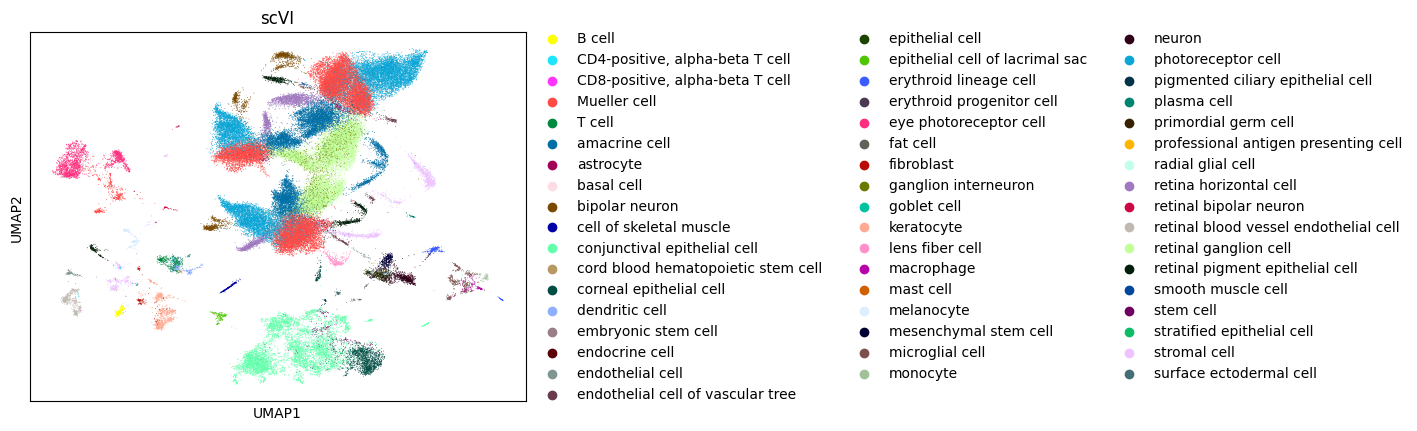

In [5]:
# look at embeddings
import scanpy
import warnings
# scVI
scanpy.pp.neighbors(adata, use_rep="scvi")
scanpy.tl.umap(adata)
scanpy.pl.umap(adata, color="cell_type", title="scVI")

/w5home/bmoore/miniconda3/envs/cellxgene/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/w5home/bmoore/miniconda3/envs/cellxgene/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/w5home/bmoore/miniconda3/envs/cellxgene/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


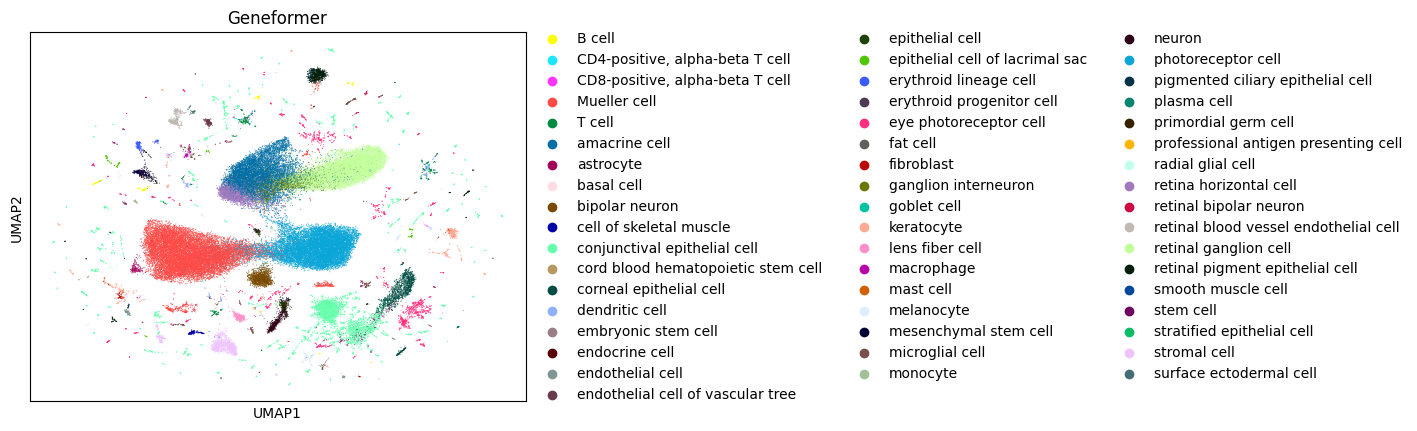

In [6]:
# Geneformer
scanpy.pp.neighbors(adata, use_rep="geneformer")
scanpy.tl.umap(adata)
scanpy.pl.umap(adata, color="cell_type", title="Geneformer")

In [7]:
# AnnData embeddings via ExperimentAxisQuery
# main advantage is you can inspect the query before loading all data
import cellxgene_census
import tiledbsoma as soma
import scanpy

census_version = "2023-12-15"

census = cellxgene_census.open_soma(census_version=census_version)

experiment = census["census_data"]["homo_sapiens"]
query = experiment.axis_query(
    measurement_name="RNA", obs_query=soma.AxisQuery(value_filter="tissue_general == 'central nervous system'")
)

In [11]:
# number of cells
query.n_obs


31780

In [12]:
# create anndata
emb_names = ["scvi", "geneformer"]

adata = query.to_anndata(X_name="raw", obsm_layers=emb_names, column_names={"obs": ["cell_type"]})

In [13]:
adata

AnnData object with n_obs × n_vars = 31780 × 60664
    obs: 'cell_type', 'tissue_general'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [14]:
query.close()
census.close()

In [15]:
# load embeddings to scipy matrices and numpy arrays
import cellxgene_census
import scipy
import tiledbsoma as soma

census_version = "2023-12-15"

census = cellxgene_census.open_soma(census_version=census_version)

experiment = census["census_data"]["homo_sapiens"]
query = experiment.axis_query(
    measurement_name="RNA", obs_query=soma.AxisQuery(value_filter="tissue_general == 'central nervous system'")
)

In [27]:
# now can access:
## Expression data via the method query.X().
## Cell and gene metadata via query.obs() and query.var(), respectively.
## The cell embeddings via the method query.obsm()

# method query.obsm() returns a reader class soma.SparseNDArrayRead, which in turns can return different types of iterators. 
# In this case we will use a blockwise.scipy() iterator that guarantees full re-indexed rows in scipy sparse csr format
emb_iter = query.obsm(layer="scvi").blockwise(axis=0).scipy()
# returns set of 3 in a tuple: scipy sparse matrix for this iteration, soma_joinid values for the rows (cells), soma_joinid values for the columns (genes).

In [28]:
# if we’d like to concatenate all of the resulting sparse matrices 
emb = scipy.sparse.vstack([chunk[0] for chunk in emb_iter])
emb

<31780x200 sparse matrix of type '<class 'numpy.float32'>'
	with 6356000 stored elements in Compressed Sparse Row format>

In [29]:
# turn to numpy array;
emb = emb.toarray()
emb

array([[ 3.9672852e-03,  1.2878418e-02,  4.8632812e-01, ...,
        -3.5742188e-01, -3.0664062e-01, -1.3198853e-03],
       [ 2.5390625e-02,  5.9814453e-03,  5.5078125e-01, ...,
        -1.6015625e-01, -1.0000000e+00,  3.6132812e-01],
       [ 1.0070801e-03,  1.9165039e-02,  5.4296875e-01, ...,
         3.9648438e-01, -9.8828125e-01,  1.1796875e+00],
       ...,
       [-3.7109375e-02,  2.3315430e-02,  7.8125000e-02, ...,
        -7.6953125e-01,  1.4218750e+00,  2.4316406e-01],
       [-1.2756348e-02,  3.1494141e-02,  4.2187500e-01, ...,
        -9.4140625e-01,  1.7890625e+00, -1.1484375e+00],
       [-2.9663086e-02, -6.2942505e-04,  4.4531250e-01, ...,
         3.6315918e-03,  8.4765625e-01, -7.2656250e-01]], dtype=float32)

In [30]:
emb.shape

(31780, 200)

In [31]:
# load with corresponding expression data or metadata. Here we retieve cell type metadata
query.obs(column_names=["cell_type"]).concat().to_pandas()

,cell_type,tissue_general
0,ependymal cell,central nervous system
1,astrocyte,central nervous system
2,astrocyte,central nervous system
3,astrocyte,central nervous system
4,astrocyte,central nervous system
...,...,...
31775,oligodendrocyte,central nervous system
31776,oligodendrocyte,central nervous system
31777,oligodendrocyte,central nervous system
31778,oligodendrocyte,central nervous system
